<a href="https://colab.research.google.com/github/Pavan250599/Gender-classification/blob/main/Gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

There is a business requirement where we need to classify the gender based on the various features using the concept of regularization. Here we are going to apply the L1 and L2 regularization and using logistic regression we are going to apply the same. There are around 5000 records on which we need to create the model and come up with the solution.

**Data Dictionary**

**long_hair** - Length of hair

**forehead_width_cm** - Forehead width of individual

**forehead_height_cm** - Forehead height of individual

**nose_wide** -	Nose width of individual

**nose_long** -	Nose length of the individual

**lips_thin** -	lips structure of the individual

**distance_nose_to_lip_long** - Distance from nose to lip

**gender** -	Dependent variables i.e. Gender


# Import Libraries

In [ ]:
#Importing the libraries which will be helpful for the data analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Regularization/gender_classification_v7.csv'

In [ ]:
#Importing the dataset
dataset = pd.read_csv(file_path)

# Understand the Data

In [ ]:
#The info command will help us to understand the different columns present in the dataset and its datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
#Len command will help us understand the total number of records present in the dataset
len(dataset)

5001

In [ ]:
#.columns command will help us understand the columns present in the dataset
dataset.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [ ]:
dataset

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
#The below command will help us understand the total number of columns present in the dataset
len(dataset.columns)

8

# Exploratory Data Analysis

<Figure size 1500x300 with 0 Axes>

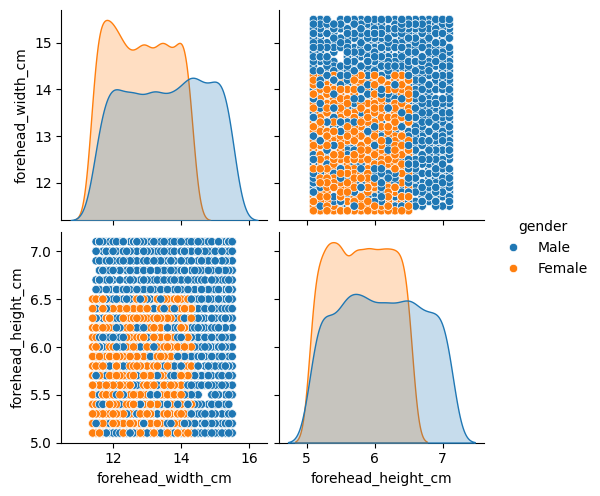

In [ ]:
plt.figure(figsize=(15,3))
sns.pairplot(dataset[['forehead_width_cm','forehead_height_cm','gender']],hue='gender')
plt.show()

**From the above chart we can see that the forehead width and height is less for the females**

<Axes: xlabel='long_hair', ylabel='count'>

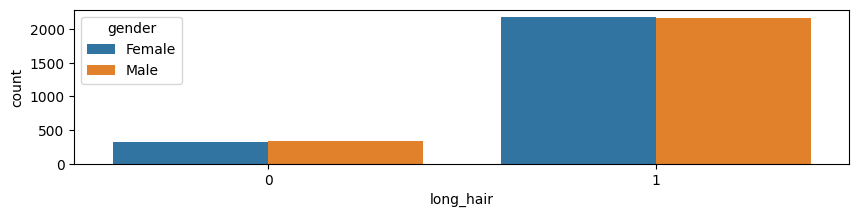

In [ ]:
plt.figure(figsize=(10,2))
sns.countplot(data=dataset, x='long_hair',hue='gender')

**From the above chart we can see that both males and females are having short as well as long hair**

<Axes: xlabel='nose_wide', ylabel='count'>

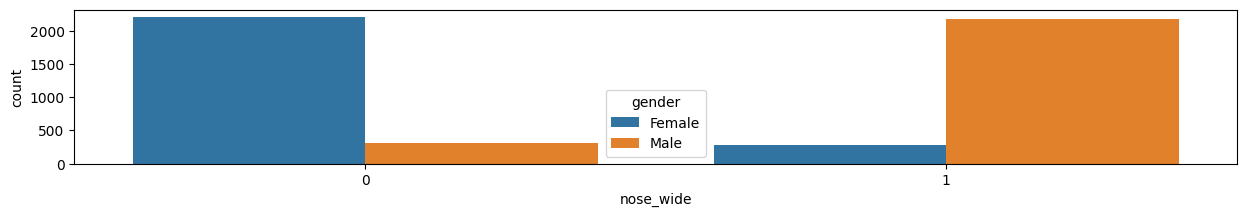

In [ ]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x='nose_wide',hue='gender')

**From the above chart we can see that the nose width is more for males as compare to females**

<Axes: xlabel='nose_long', ylabel='count'>

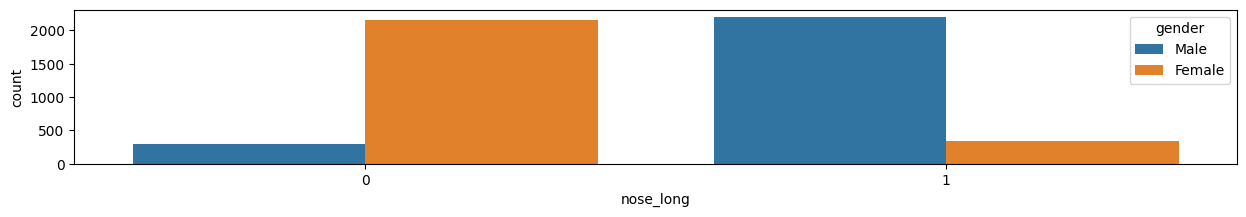

In [ ]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x='nose_long',hue='gender')

**From the above chart we can see that the nose are longer for the males as compare to females**

<Axes: xlabel='lips_thin', ylabel='count'>

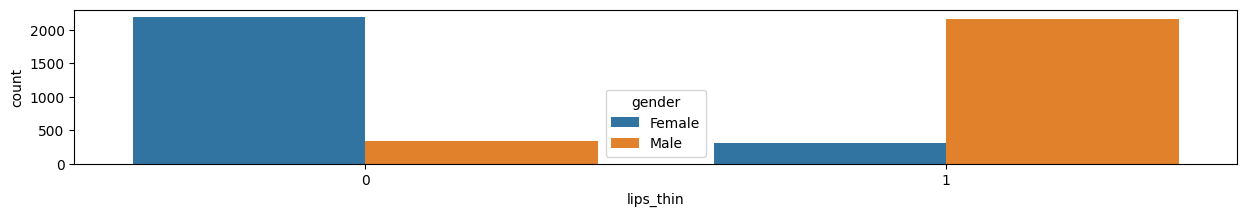

In [ ]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x='lips_thin',hue='gender')

**From the above chart we can see that the lips are thinner for males than the females**

<Axes: xlabel='distance_nose_to_lip_long', ylabel='count'>

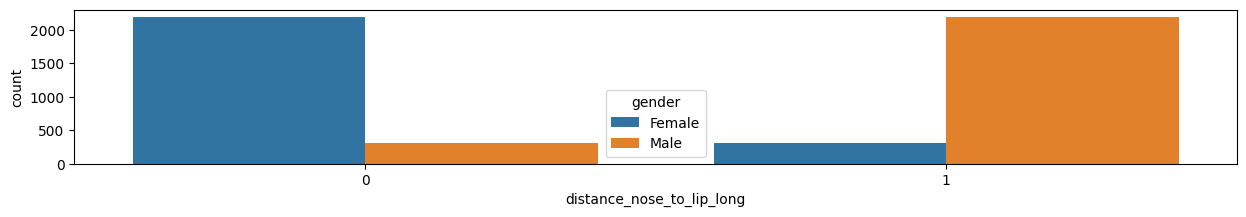

In [ ]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x='distance_nose_to_lip_long',hue='gender')

**From the above chart we can see that the distance from the nose to the lip is more for the males than the females**

# Missing Value Treatment

In [ ]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
dataset.isnull().sum()/len(dataset)*100

,0
long_hair,0.0
forehead_width_cm,0.0
forehead_height_cm,0.0
nose_wide,0.0
nose_long,0.0
lips_thin,0.0
distance_nose_to_lip_long,0.0
gender,0.0


We don't haev missing values in the given dataset.

# Encoding and Feature Scaling

In [ ]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

def feature_scaling(dataset, numerical):
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset = feature_scaling(dataset, numerical)

In [ ]:
dataset

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,-1.247933,0.283971,1,0,1,1,1
1,0,0.739389,-1.009418,0,0,1,0,0
2,0,-1.247933,0.653511,1,1,1,1,1
3,0,1.100720,0.283971,0,1,1,1,1
4,1,0.287725,-0.085568,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,0.378057,-1.563727,0,0,0,0,0
4997,1,-1.157600,-1.009418,0,0,0,0,0
4998,1,-0.254272,-0.455108,0,0,0,0,0
4999,1,0.016726,0.468741,0,0,0,0,0


# Splitting the data into Train and Test

In [ ]:
dataset

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,-1.247933,0.283971,1,0,1,1,1
1,0,0.739389,-1.009418,0,0,1,0,0
2,0,-1.247933,0.653511,1,1,1,1,1
3,0,1.100720,0.283971,0,1,1,1,1
4,1,0.287725,-0.085568,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,0.378057,-1.563727,0,0,0,0,0
4997,1,-1.157600,-1.009418,0,0,0,0,0
4998,1,-0.254272,-0.455108,0,0,0,0,0
4999,1,0.016726,0.468741,0,0,0,0,0


In [ ]:
#Splitting all the independent variables in one array
x = dataset.iloc[:,0:7].values
x

array([[ 1.        , -1.24793291,  0.28397148, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.        ,  0.73938869, -1.00941773, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -1.24793291,  0.65351125, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 1.        , -0.25427211, -0.45510807, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.01672629,  0.46874136, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  2.00404789, -1.00941773, ...,  1.        ,
         1.        ,  1.        ]])

In [ ]:
#Splitting the dependent variable in one array
y = dataset.iloc[:,-1].values
y

array([1, 0, 1, ..., 0, 0, 1], dtype=int8)

In [ ]:
#Splitting the dataset into train and test based on the 70-30 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

# Creating the model on training dataset

In [ ]:
#Applying the Logistic Regression on the training dataset
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Run the model on the Test Dataset

In [ ]:
#Running the model on the test dataset
y_pred_ini = model.predict(x_test)

# Check the accuracy of the model

There are various ways to check the accuracy of the classification model we are going to use all the ways to check the accuracies

In [ ]:
#Importing all the functions to for checking the accuracies
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, log_loss,roc_curve, auc,RocCurveDisplay, PrecisionRecallDisplay,ConfusionMatrixDisplay

# Accuracy Score

In [ ]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ini)

0.9686875416389074

# Confusion Matrix

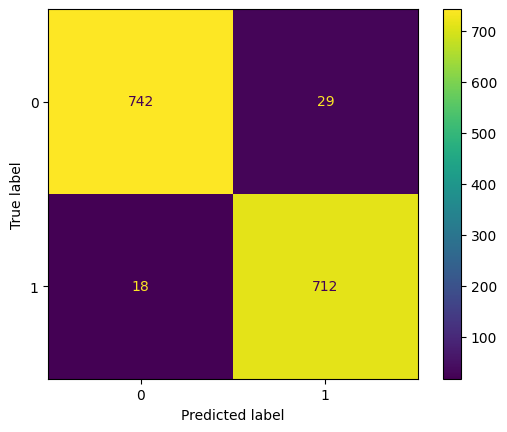

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_ini, labels=model.classes_)

# Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

# ROC Curve

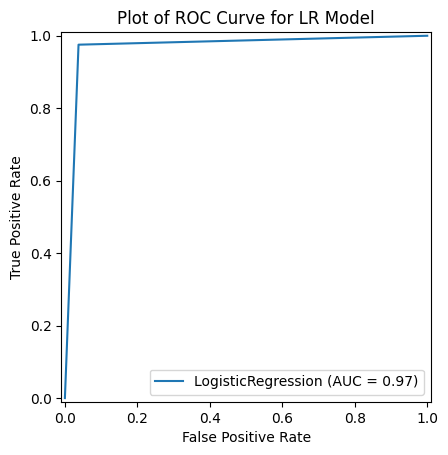

In [ ]:
# Assuming y_true are the true binary labels
# and y_scores are the probability estimates of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ini)
roc_auc = auc(fpr, tpr)

# Create RocCurveDisplay
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LogisticRegression')

# Plot the ROC curve
display.plot()
plt.title("Plot of ROC Curve for LR Model")
plt.show()

# F1 Score

In [ ]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,logmodel_ini.predict(x_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.98      0.96      0.97       771
 Positive(1)       0.96      0.98      0.97       730

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



# Log Loss

In [ ]:
#Using Logloss we are checking the accuracy on the testing dataset
log_loss(y_test,model.predict(x_test))

1.1286153959283856

# Comparing the Training and Testing Accuracies

In [ ]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = model.predict(x_train)

In [ ]:
#Checking the accuracy of training dataset
accuracy_score(y_train,y_pred_train)

0.9677142857142857

In [ ]:
#Checking the accuracy of testing dataset
accuracy_score(y_test,y_pred_ini)

0.9686875416389074

**Conclusion:** As there is very less difference between the accuracy of training and testing dataset we are good to go with the model


# Applying K-Fold Cross Validation to find the best value of C (C = 1/Lambda)

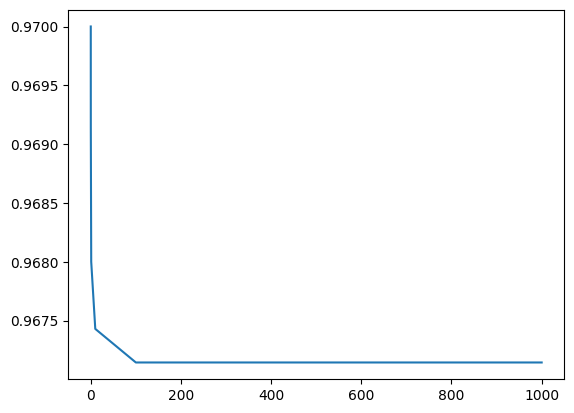

In [ ]:
#Using K-fold cross validation technique we will find the best value of C
C = [0.01,0.1,1,10,100,1000]
from sklearn.model_selection import cross_val_score
cv_score = []

for c in C:
    logmodel = LogisticRegression(C=c)
    scores = cross_val_score(logmodel, x_train,y_train,cv=3, scoring='accuracy')
    cv_score.append(scores.mean())

cv_score
plt.plot(C, cv_score)
plt.show()
#The best value of depth is coming out to be 7, we will retrain the model with the value of depth as 7

In [ ]:
#Applying the Logistic Regression on the training dataset
from sklearn.linear_model import LogisticRegression
logmodel_ridge = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
logmodel_ridge.fit(x_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
logmodel_ridge.coef_

array([[-0.71679449,  0.43769507,  0.36952005,  1.07671602,  1.06512134,
         1.02351   ,  1.07202482]])

In [ ]:
#Running the model on the test dataset
y_pred_ridge = logmodel_ridge.predict(x_test)

In [ ]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ridge)

0.9560293137908061

In [ ]:
#Running the model on the test dataset
y_pred_train_ridge = logmodel_ridge.predict(x_train)

In [ ]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_train,y_pred_train_ridge)

0.9657142857142857

In [ ]:
#Applying the Logistic Regression on the training dataset
from sklearn.linear_model import LogisticRegression
logmodel_lasso = LogisticRegression(C=0.01,penalty='l1',solver='liblinear')
logmodel_lasso.fit(x_train,y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [ ]:
logmodel_lasso.coef_

array([[0.        , 0.26386427, 0.18250046, 1.18312218, 1.12106692,
        1.0446239 , 1.19828935]])

In [ ]:
#Running the model on the test dataset
y_pred_lasso = logmodel_lasso.predict(x_test)

In [ ]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_lasso)

0.9573617588274483

In [ ]:
#Running the model on the train dataset
y_pred_train_lasso = logmodel_lasso.predict(x_train)

In [ ]:
#Using accuracy score we are checking the accuracy on the training dataset
accuracy_score(y_train,y_pred_train_lasso)

0.9674285714285714

# Comparison of Lasso and Ridge models

In [ ]:
logmodel_lasso.coef_

array([[0.        , 0.26386427, 0.18250046, 1.18312218, 1.12106692,
        1.0446239 , 1.19828935]])

In [ ]:
logmodel_ridge.coef_

array([[-0.71679449,  0.43769507,  0.36952005,  1.07671602,  1.06512134,
         1.02351   ,  1.07202482]])

**From the above coefficients we can say that the first feature i.e. long hair is not a very important variable that is the reason in the lasso logistic regression we can see the coefficient coming as 0, however, in the ridge we are seeing a lower coefficient. We also saw this in the exploratory data analysis that there are almost same number of males and females with long and short hairs.**

In [ ]:
#Applying the Logistic Regression on the training dataset with Elastic net, we are adding l1_ratio = 0.5
#that means we are adding boht L1 and L2.
#The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'.
#Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'.
#For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.
from sklearn.linear_model import LogisticRegression
logmodel_elasticnet = LogisticRegression(C=0.01,penalty='elasticnet',solver='saga',l1_ratio=0.5)
logmodel_elasticnet.fit(x_train,y_train)

LogisticRegression(C=0.01, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [ ]:
logmodel_elasticnet.coef_

array([[0.        , 0.31136165, 0.24609913, 1.32521288, 1.30077654,
        1.24788907, 1.32581656]])

In [ ]:
#Running the model on the test dataset
y_pred_elasticnet = logmodel_elasticnet.predict(x_test)

In [ ]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_elasticnet)

0.9686875416389074

In [ ]:
#Running the model on the train dataset
y_pred_train_elasticnet = logmodel_elasticnet.predict(x_train)

In [ ]:
#Using accuracy score we are checking the accuracy on the training dataset
accuracy_score(y_train,y_pred_train_elasticnet)

0.9677142857142857

In [ ]:
# create an empty dataframe to store the scores for various algorithms
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

# append the result table for all performance scores

def update_score_card(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = pd.concat([score_card,pd.DataFrame([{'model_name':model_name,
                                    'Accuracy Score' : accuracy_score(y_test, y_pred),
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'AUC Score': roc_auc_score(y_test, y_pred),
                                    'f1 Score': f1_score(y_test, y_pred)}])],
                                    ignore_index = True)

In [ ]:
update_score_card(y_test,y_pred_ini,'initial_model')

<ipython-input-59-79ab38eb6a2a>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score_card = pd.concat([score_card,pd.DataFrame([{'model_name':model_name,


In [ ]:
update_score_card(y_test,y_pred_ridge,'Ridge Regression - L2 Reg')

In [ ]:
update_score_card(y_test,y_pred_lasso,'Lasso Regression - L1 Reg')

In [ ]:
update_score_card(y_test,y_pred_elasticnet,'Elastic Net - L1 and L2')

In [ ]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,initial_model,0.968688,0.960864,0.975342,0.968864,0.968049
1,Ridge Regression - L2 Reg,0.956029,0.934555,0.978082,0.956616,0.955823
2,Lasso Regression - L1 Reg,0.957362,0.937008,0.978082,0.957913,0.957105
3,Elastic Net - L1 and L2,0.968688,0.962111,0.973973,0.968828,0.968005


**Interpretation: As per the above table, the initial model and the Elasticnet are giving the same accuracy score, however if the use case is to get the output faster i.e. low latency system we can go with L1 regularization**